**ЛАБОРАТОРНАЯ РАБОТА №6**
Плотников Федор
ИУ5-81Б
Вариант №18

**Задание 1.**

$K$ программистов могут писать программы для выполнения на одном из $M$
 серверов, при этом программа не попадает сразу на сервер, а обрабатывается на одном из $N$ специальных компьютеров, которые проверяют отсутствие вирусов. Интенсивность работы программистов $\lambda$
, интенсивность работы компьютеров-антивирусов $\nu$, интенсивность работы основных серверов $\mu$, программа оказывается с вирусом с вероятностью $p$. Если программа с вирусом, она получает отказ обслуживания на основных серверах. Для компьютеров по проверке вирусов имеется ограничение по длине очереди $m_1$, для основных серверов ограничение по длине очереди $m_2$. Для компьютеров по проверке вирусов имеется ограничение по длине очереди.

- Нарисовать граф состояний системы, учитывая количество программистов, которые пишут программу, количество программ на компьютерах-антивирусах, количество программ на серверах;
- Написать уравнения Колмогорова для вероятностей состояний, финальных вероятностей;
- Тремя способами (экспериментально, методом укрупнения состояний, по уравнениям Колмогорова) найти основные характеристики эффективности СМО: среднее время пребывания заявки в системе, абсолютную пропускную способность, среднее число заявок в системе.

In [ ]:
Variant<-18
set.seed(Variant) 
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)
View(data.frame(K,M,N,lambda,mu,nu,p,m1,m2))

K M N lambda  mu        nu       p         m1 m2
1 4 1 2 0.38778 0.5103884 0.366148 0.2179308 2  1

Граф состояний, где 
- первый разряд отвечает за количество программистов, пищущих программу в данный момент,
- второй разряд - за количество программ, проверяемых антивирусом,
- третий разряд обозначает количество программ, обрабатываемых сервером,
- последние два разряда показывают сколько программ находится в очереди на обработку специальным компьюетром и сервисом соответсвенно.


Ксюша Удод.drawio.png

Запишем уравнения Колмогорова:
- $p*\nu*P_{31000}+\mu*P_{30100}-4*\lambda*P_{40000} = 0$
- $4*\lambda*P_{40000}+2*p*\nu*P_{22000}-p*\nu*P_{31000}-3*\lambda*P_{31000}-((1-p)*\nu)*P_{31000} = 0$
- $3*\lambda*P_{31000}+3*p*\nu*P_{12010}-2*p*\nu*P_{22000}-2*\lambda*P_{22000}-(2*(1-p)*\nu)*P_{22000}=0$
- $2*\lambda*P_{22000}+4*p*\nu*P_{02020}-3*p*\nu*P_{12010}-\lambda*P_{12010}-(3*(1-p)*\nu)*P_{12010}=0$
- $\lambda*P_{12010}-4*p*\nu*P_{02020}-(4*(1-p)*\nu)*P_{02020}=0$
- $\mu*P_{20101} + p*\nu*P_{21100}+(1-p)*\nu*P_{31000}-\mu*P_{30100}-3*\lambda*P_{30100}=0$
- $3*\lambda*P_{30100}+2*p*\nu*P_{12100}+\mu*P_{11101}+2*(1-p)*\nu*P_{22000}-P_{21100}*(p*\nu+\mu+2*\lambda+(1-p)*nu)=0$
- $2*\lambda*P_{21100}+3*p*\nu*P_{02110}+2*\mu*P_{02101}+3*(1-p)*\nu*P_{12010}-P_{12100}*(2*p*\nu+2*\mu+\lambda+2*(1-p)*\nu)=0$
- $\lambda*P_{12100}+3*p*\nu*P_{02110}+2*\mu*P_{02101}+4*(1-p)*\nu*P_{02020}-P_{02110}*(3*p*\nu+3*\mu+3*(1-p)*nu)=0$
- $ p*\nu*P_{11101}+(1-p)*\nu*P_{21100}-\mu*P_{20101}-2*\lambda*P_{20101}=0$
- $2*p*\nu*P_{02101}+2*(1-p)*\nu*P_{12100}+2*\lambda*P_{20101}-P_{11101}*(p*\nu+\lambda+\mu)=0$
- $\lambda*P_{11101}+3*(1-p)*\nu*P_{02110}-2*\mu*P_{02101}+2*p*\nu*P_{02101}=0$


Решим уравнения в maxima, заменив последнее уравнение, уравнением нормировки:
lambda:0.38778$ mu:0.5103884$ nu:0.366148$ p:0.2179308$
solve([p*nu*P31000+mu*P30100-4*lambda*P40000=0,
4*lambda*P40000+2*p*nu*P22000-p*nu*P31000-3*lambda*P31000-((1-p)*nu)*P31000=0,
3*lambda*P31000+3*p*nu*P12010-2*p*nu*P22000-2*lambda*P22000-(2*(1-p)*nu)*P22000=0,
2*lambda*P22000+4*p*nu*P02020-3*p*nu*P12010-lambda*P12010-(3*(1-p)*nu)*P12010=0,
lambda*P12010-4*p*nu*P02020-(4*(1-p)*nu)*P02020=0,
mu*P20101 + p*nu*P21100+(1-p)*nu*P31000-mu*P30100-3*lambda*P30100=0,
3*lambda*P30100+2*p*nu*P12100+mu*P11101+2*(1-p)*nu*P22000-P21100*(p*nu+mu+2*lambda+(1-p)*nu)=0,
2*lambda*P21100+3*p*nu*P02110+2*mu*P02101+3*(1-p)*nu*P12010-P12100*(2*p*nu+2*mu+lambda+2*(1-p)*nu)=0,
lambda*P12100+3*p*nu*P02110+2*mu*P02101+4*(1-p)*nu*P02020-P02110*(3*p*nu+3*mu+3*(1-p)*nu)=0,
p*nu*P11101+(1-p)*nu*P21100-mu*P20101-2*lambda*P20101=0,
2*p*nu*P02101+2*(1-p)*nu*P12100+2*lambda*P20101-P11101*(p*nu+lambda+mu)=0,
P40000+P31000+P22000+P12010+P02020+P30100+P21100+P12100+P02110+P20101+P11101+P02101=1],
[P40000, P31000, P22000, P12010, P02020, P30100, P21100, P12100, P02110, P20101, P11101, P02101]);
float(%);

In [ ]:
P40000 <- 0.005185592344281221
P31000 <- 0.005767981856804906
P22000 <- 0.004878650001447825
P12010 <- 0.002699326432384025
P02020 <- 7.147006155638412*10^-4
P30100 <- 0.014857744236365
P21100 <- 0.08917641815018396
P12100 <- 0.1949764198900827
P02110 <- 0.160617727269551
P20101 <- 0.03154523774257773
P11101 <- 0.1883529095783956
P02101 <- 0.3012272918823622

С помощью полученных финальных вероятностей найдём характеристики эффективности системы.  
Cреднее число заявок в системе:

In [ ]:
Lsys <- 1*(P31000+P30100)+2*(P22000+P21100+P20101)+3*(P12010+P12100+P11101)+4*(P02020+P02110+P02110)

In [ ]:
Lsys

[1] 2

Абсолютная пропускная способность  

In [ ]:
a <- (P30100+P20101+P21100+P11101)*mu + (P12100+P02101)*2*mu + P02110*3*mu

In [ ]:
a

[1] 0.3177767

Среднее время пребывания заявки в системе  

In [ ]:
i <- (K-Lsys_t)*lambda
Tsys <- Lsys/i
Tsys

[1] 5.465537

Перейдём к методу укрупнения состояний. 

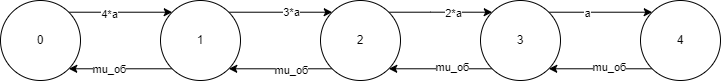

Получим систему уравнений:  
$P_0=(1+\frac{4\lambda}{\mu_{общ}}+\frac{4 \cdot 3\lambda^2}{\mu_{общ}^2}+\frac{4 \cdot 3 \cdot 2\lambda^3}{\mu_{общ}^3}+\frac{4 \cdot 3 \cdot 2 \cdot 1\lambda^4}{\mu_{общ}^4})^{-1}$  
$P_1=P_0 \frac{4 \lambda}{\mu_{общ}}$  
$P_2=P_0 \frac{4 \cdot 3 \lambda^2}{\mu_{общ}^2}$  
$P_3=P_0 \frac{4 \cdot 3 \cdot 2 \lambda^3}{\mu_{общ}^3}$  
$P_4=P_0 \frac{4 \cdot 3 \cdot 2 \cdot 1 \lambda^4}{\mu_{общ}^4}$  
$L_{сист}=\sum\limits_{k=1}^4 k \cdot P_k$  
$T_{сист}=\frac{L_{сист}}{\lambda(4-L_{сист})}$ 

Вторая модель:

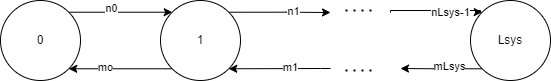

Возьмём начальный $\mu_{общ}=\mu$. Прогоним несколько итераций по 2 моделям:

In [ ]:
muo<-1*mu
for (i in 1:4){
  # 1 модель
  P0<-1/(1+4*lambda/muo+4*3*lambda^2/muo^2+4*3*2*lambda^3/muo^3+4*3*2*1*lambda^4/muo^4)
  P1<-P0*4*lambda/muo
  P2<-P0*4*3*lambda^2/muo^2
  P3<-P0*4*3*2*lambda^3/muo^3
  P4<-4*3*2*1*lambda^4/muo^4
  Lsys<-P1+3*P2+3*P3+4*P4
  print(Lsys)
  Tsys<-Lsys/(lambda*(4-Lsys))
  Lsysint <- as.integer(Lsys)
  # 2 модель
  if(Lsysint!=0){
    Lsys<-Lsysint
    nus<-sample(0,Lsys,replace=TRUE)
    mus<-sample(0,Lsys,replace=TRUE)
    pi0<-1
    koef<-1
    for (i in 1:Lsys){
      nus[i]<-(1-p)*nu*min(4,Lsys-i+1)
      mus[i]<-mu*min(4,i)
      koef<-koef*nus[i]/mus[i]
      pi0<-pi0+koef
    }
    pi0<-1/pi0
    koef<-1
    muo<-0
    for (i in 1:Lsys){
      koef<-koef*nus[i]/mus[i]
      muo<-muo+pi0*koef*mus[i]
    }
  }
}

[1] 33.86826
[1] 2.923922
[1] 121.5093
[1] 2.923922


Значения Lsys, Tsys близки к настоящим  

In [ ]:
Lsys
Tsys
a1 <- muo*(P1+P2+P3+P4)
a1

[1] 2

[1] 7.007068

[1] 0.3855719

Экспериментальная часть 

In [ ]:
Variant <- 18
set.seed(Variant) 
K<-sample(c(3:6),1)
M<-sample(c(1:3),1)
N<-sample(c(1:3),1)
lambda<-runif(1)
mu<-runif(1)
nu<-runif(1)
p<-runif(1)
m1<-sample(c(1:2),1)
m2<-sample(c(1:2),1)


# переменные для очерди
queue_for_server <- c()
queue_for_computers <- c()

# переменные для задач
tasks_id_for_computers <- rep(0, N)
task_id_for_server <- rep(0, M)
created_tasks <- c()

# переменные для хранения событий
events_for_computers <- c()
events_for_computers_id <- c()
events_for_tasks <- c() 
events_for_tasks_id <- c()
events_for_server <- c()
events_for_server_id <- c()

for (i in c(1:K)) {
  created_tasks = c(created_tasks, rexp(1, lambda))
  events_for_tasks <- c(events_for_tasks, created_tasks[i])
  events_for_tasks_id <- c(events_for_tasks_id, i)
}


# число задач в эксперименте
count_tasks <- 1000

# переменные времени
current_time <- 0 
time_step <- 0.01

# переменные параметров модели
number_of_task_in_system_in_current_moment <- 0
number_of_task_in_system_for_each_moment <- c()
times_of_task_in_system <- c()
number_leave_tasks <- 0

while(length(created_tasks) != count_tasks) {
  i <- 1
  while(i <= length(events_for_tasks)) { # оброботка появление новой задачи в системе
    if (events_for_tasks[i] <= current_time) { # если наступило время появления задачи
      if (length(queue_for_computers) == m1) { # если её некуда поместить, то отмечаем её как вышедшую и создаём событие появление новой
        created_tasks = c(created_tasks, events_for_tasks[i] + rexp(1, lambda))
        events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
        events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
        times_of_task_in_system <- c(times_of_task_in_system, 0)
      } else { # иначе добавляем её на проверку на вирусы
        number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment + 1
        found_id <- 0
        
        for(j in c(1:length(tasks_id_for_computers))) {
          if (tasks_id_for_computers[j] == 0) {
            found_id <- j
            break
          }
        }
        
        if (found_id != 0) { # если есть свободные компьютеры то отправляем задачу им
          tasks_id_for_computers[found_id] <- events_for_tasks_id[i]
          
          events_for_computers <- c(events_for_computers, events_for_tasks[i] + rexp(1, nu))
          events_for_computers_id <- c(events_for_computers_id, found_id)
        } else { # иначе отправляем в очередь
          queue_for_computers = c(queue_for_computers, events_for_tasks_id[i])
        }
      }
      
      events_for_tasks <- events_for_tasks[-i]
      events_for_tasks_id <- events_for_tasks_id[-i]
    } else {
      i <- i + 1
    }
  }
  
  i <- 1
  
  while(i <= length(events_for_computers)) { # обработка окончание проверки задачи на вирусы
    if (events_for_computers[i] <= current_time) { # если наступило событие
      random <- runif(1)
      
      if ((length(queue_for_server) == m2 && random > p) || random <= p) { # если была найдена ошибка или для корректной програмы нету место в серверах, то считаем задачу вышедшей из системы и создаём событие новой задачи
        times_of_task_in_system <- c(times_of_task_in_system, events_for_computers[i] - created_tasks[tasks_id_for_computers[events_for_computers_id[i]]])

        number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment - 1
        created_tasks = c(created_tasks, events_for_computers[i] + rexp(1, lambda))
        events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
        events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
      } else {
        if (random > p) {  # если не было ошибки в задаче, то добавляем её на сервер
          found_id <- 0
          
          for(j in c(1:length(task_id_for_server))) {
            if (task_id_for_server[j] == 0) {
              found_id <- j
              break
            }
          }
          
          if (found_id != 0) { # если есть свободные сервера то отправляем задачу им
            task_id_for_server[found_id] <- tasks_id_for_computers[events_for_computers_id[i]]
            events_for_server <- c(events_for_server, events_for_computers[i] + rexp(1, mu))
            events_for_server_id <- c(events_for_server_id, found_id)
          } else { # иначе отправляем в очередь
            queue_for_server = c(queue_for_server, tasks_id_for_computers[events_for_computers_id[i]])
          }
        }
      }
      
      if (length(queue_for_computers) == 0) { #  если больше нет задач, то освобождаем компьютер
        tasks_id_for_computers[events_for_computers_id[i]] <- 0
      } else { #  иначе забираем задачу из очереди
        tasks_id_for_computers[events_for_computers_id[i]] <- queue_for_computers[1]
        queue_for_computers <- queue_for_computers[-1]
        
        events_for_computers <- c(events_for_computers, events_for_computers[i] + rexp(1, nu))
        events_for_computers_id <- c(events_for_computers_id, events_for_computers_id[i])
      }
      
      events_for_computers <- events_for_computers[-i]
      events_for_computers_id <- events_for_computers_id[-i]
    } else {
      i <- i + 1
    }
  }
  
  i <- 1
  
  while(i <= length(events_for_server)) { # обработка завершения исполнения проверенной задачи на сервере
    if (events_for_server[i] <= current_time) { #  если наступило время события, отмечаем её как выполневшейся и сохраняем время в системе, также создаём событие новой задачи
      times_of_task_in_system <- c(times_of_task_in_system, events_for_server[i] - created_tasks[task_id_for_server[events_for_server_id[i]]])
      number_leave_tasks <- number_leave_tasks + 1
      number_of_task_in_system_in_current_moment <- number_of_task_in_system_in_current_moment - 1 
      
      created_tasks = c(created_tasks, events_for_server[i] + rexp(1, lambda))
      events_for_tasks <- c(events_for_tasks, created_tasks[length(created_tasks)])
      events_for_tasks_id <- c(events_for_tasks_id, length(created_tasks))
      
      if (length(queue_for_server) == 0) { #  если больше нет задач, то освобождаем сервер
        task_id_for_server[events_for_server_id[i]] = 0
      } else {  #  иначе забираем задачу из очереди
        task_id_for_server[events_for_server_id[i]] <- queue_for_server[1]
        queue_for_server <- queue_for_server[-1]
        events_for_server <- c(events_for_server, events_for_server[i] + rexp(1, mu))
        events_for_server_id <- c(events_for_server_id, events_for_server_id[i])
      }
      
      events_for_server <- events_for_server[-i]
      events_for_server_id <- events_for_server_id[-i]
    } else {
      i <- i + 1
    }
  }
  
  number_of_task_in_system_for_each_moment <- c(number_of_task_in_system_for_each_moment, number_of_task_in_system_in_current_moment)
  current_time <- current_time + time_step
}
  
L_sys_P <- sum(number_of_task_in_system_for_each_moment) / (current_time / time_step)
T_sys_P <- mean(times_of_task_in_system)
A_P <- number_leave_tasks/current_time

L_sys_P
T_sys_P
A_P

[1] 2.645243

[1] 5.160929

[1] 0.3167339